In [5]:


import os
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import SimpleRNN

from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import math
from sklearn.metrics import mean_squared_error
import FinanceDataReader as fdr

Using TensorFlow backend.


In [132]:
BATCH = 25


df = fdr.DataReader("KS11","2009-01-01","2019-01-01")
df=df[0:-(len(df)%BATCH)]


y=[]
for a in range(1,10001):
    try:
        y.append(np.where(df["Change"][-1+(BATCH*a)]>0,1,0))
    except:
        continue

df = df.values
df.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
df = scaler.fit_transform(df)
#for x in range(100):



x=0
Xtrain_size=int(df.shape[0]/BATCH*0.7)*BATCH + (x*BATCH)

X_train=df[0:Xtrain_size]
X_test=df[Xtrain_size:Xtrain_size+BATCH]

y_train=y[ 0 : int(Xtrain_size/BATCH) ]
y_test=y[int(Xtrain_size/BATCH)]

# many to one 전처리 필요
y_train = np.reshape(y_train, (len(y_train), 1))
y_test = np.reshape(y_test, (1, 1))
X_train = np.reshape(X_train, (int(X_train.shape[0]/BATCH),BATCH, X_train.shape[1]))
X_test = np.reshape(X_test, (int(X_test.shape[0]/BATCH),BATCH, X_test.shape[1]))
# simple lstm network learning
model = Sequential()
model.add(LSTM(36, input_shape=(BATCH, 6)))
for i in range(5):
    model.add(Dense(36,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
model.fit(X_train, y_train, epochs=10, batch_size=16,validation_split=0.1)

    

Train on 61 samples, validate on 7 samples
Epoch 1/10


KeyboardInterrupt: 

In [7]:
df = fdr.DataReader("KS11","2009-01-01","2019-01-01")
돈 = 10000
(돈 * df["Change"][-1]) - ( 돈 * df["Change"][0] )
돈 + ( 돈 * (df["Close"][-1] - df["Close"][0])/ df["Close"][0] )


-231.00000000000006

In [15]:
돈 + ( 돈 * (df["Close"][-1] - df["Close"][0])/ df["Close"][0] )


17634.698462070155

C:\Program Files\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


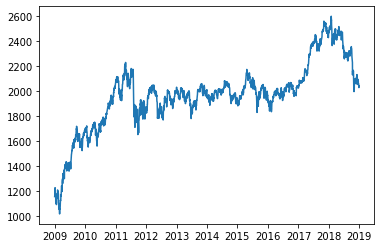

In [13]:
plt.plot(df["Close"])